## Data Preparation

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# city regions

regions = [
    'Aldoar',
    'Bonfim',
    'Campanha',
    'Centro',
    'Lordelo',
    'Paranhos',
    'Ramalde'
]

In [3]:
# read json files

region_data = {region: pd.read_json(f'logs/{region.lower()}.json') for region in regions}

In [4]:
def get_global_limits(regions, region_data):
    global_limits = {
        'chargers': [float('inf'), float('-inf')],
        'queue': [float('inf'), float('-inf')],
        'wait_time': [float('inf'), float('-inf')],
        'autonomy': [float('inf'), float('-inf')]
    }
    for region in regions:
        data = region_data[region]
        
        global_limits['chargers'][0] = min(global_limits['chargers'][0], min(data['chargers']))
        global_limits['chargers'][1] = max(global_limits['chargers'][1], max(data['chargers']))
        
        global_limits['queue'][0] = min(global_limits['queue'][0], min(data['queue']))
        global_limits['queue'][1] = max(global_limits['queue'][1], max(data['queue']))
        
        global_limits['wait_time'][0] = min(global_limits['wait_time'][0], min(data['wait']))
        global_limits['wait_time'][1] = max(global_limits['wait_time'][1], max(data['wait']))
        
        global_limits['autonomy'][0] = min(global_limits['autonomy'][0], min(data['autonomy']))
        global_limits['autonomy'][1] = max(global_limits['autonomy'][1], max(data['autonomy']))
    return {
        'chargers': global_limits['chargers'],
        'queue': global_limits['queue'],
        'wait_time': global_limits['wait_time'],
        'autonomy': global_limits['autonomy']
    }

In [5]:
# get global min and max values

global_limits = get_global_limits(regions, region_data)

global_limits

{'chargers': [0, 171],
 'queue': [0.0, 4.68],
 'wait_time': [0.0, 94.56],
 'autonomy': [51.68, 78.66]}

In [6]:
# steps to hours

time_steps = np.linspace(0, 1440, len(region_data['Aldoar']['chargers']), endpoint=False)
hours = time_steps / 60

## Results Visualization

### Charger Availability

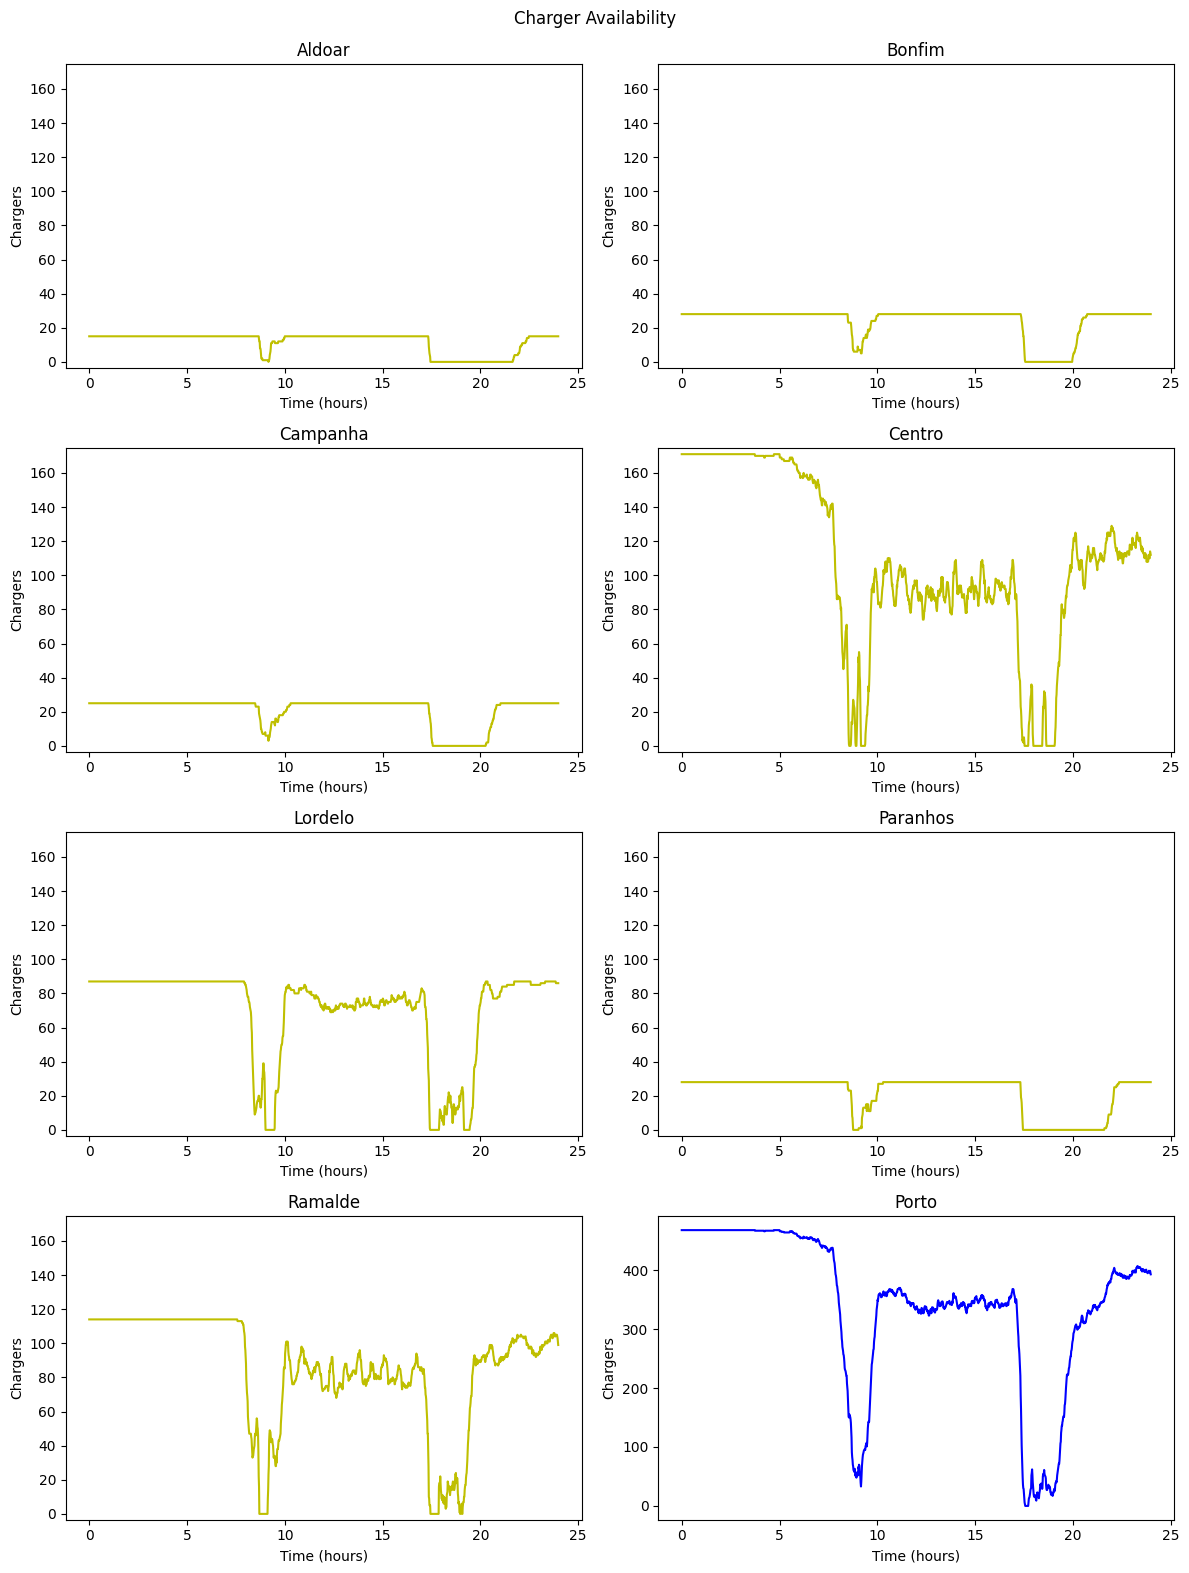

In [7]:
def plot_charger_availability(regions, region_data, global_limits, hours):
    num_regions = len(regions)
    cols = 2
    rows = (num_regions + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    fig.suptitle("Charger Availability", fontsize=12)
    axes = axes.flatten()
    min_chargers, max_chargers = global_limits['chargers']
    y_min = min_chargers - 0.02 * (max_chargers - min_chargers)
    y_max = max_chargers + 0.02 * (max_chargers - min_chargers)
    for i, region in enumerate(regions):
        ax = axes[i]
        ax.plot(hours, region_data[region]['chargers'], color='y')
        ax.set_title(region)
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel("Chargers")
        ax.set_ylim(y_min, y_max)
    total_chargers = [sum(region_data[region]['chargers'][j] for region in regions) for j in range(len(hours))]
    ax_total = axes[-1]
    ax_total.plot(hours, total_chargers, color='b')
    ax_total.set_title("Porto")
    ax_total.set_xlabel("Time (hours)")
    ax_total.set_ylabel("Chargers")
    plt.tight_layout(rect=[0, 0, 1, 0.99]) 
    plt.show()

plot_charger_availability(regions, region_data, global_limits, hours)

### Queue Size

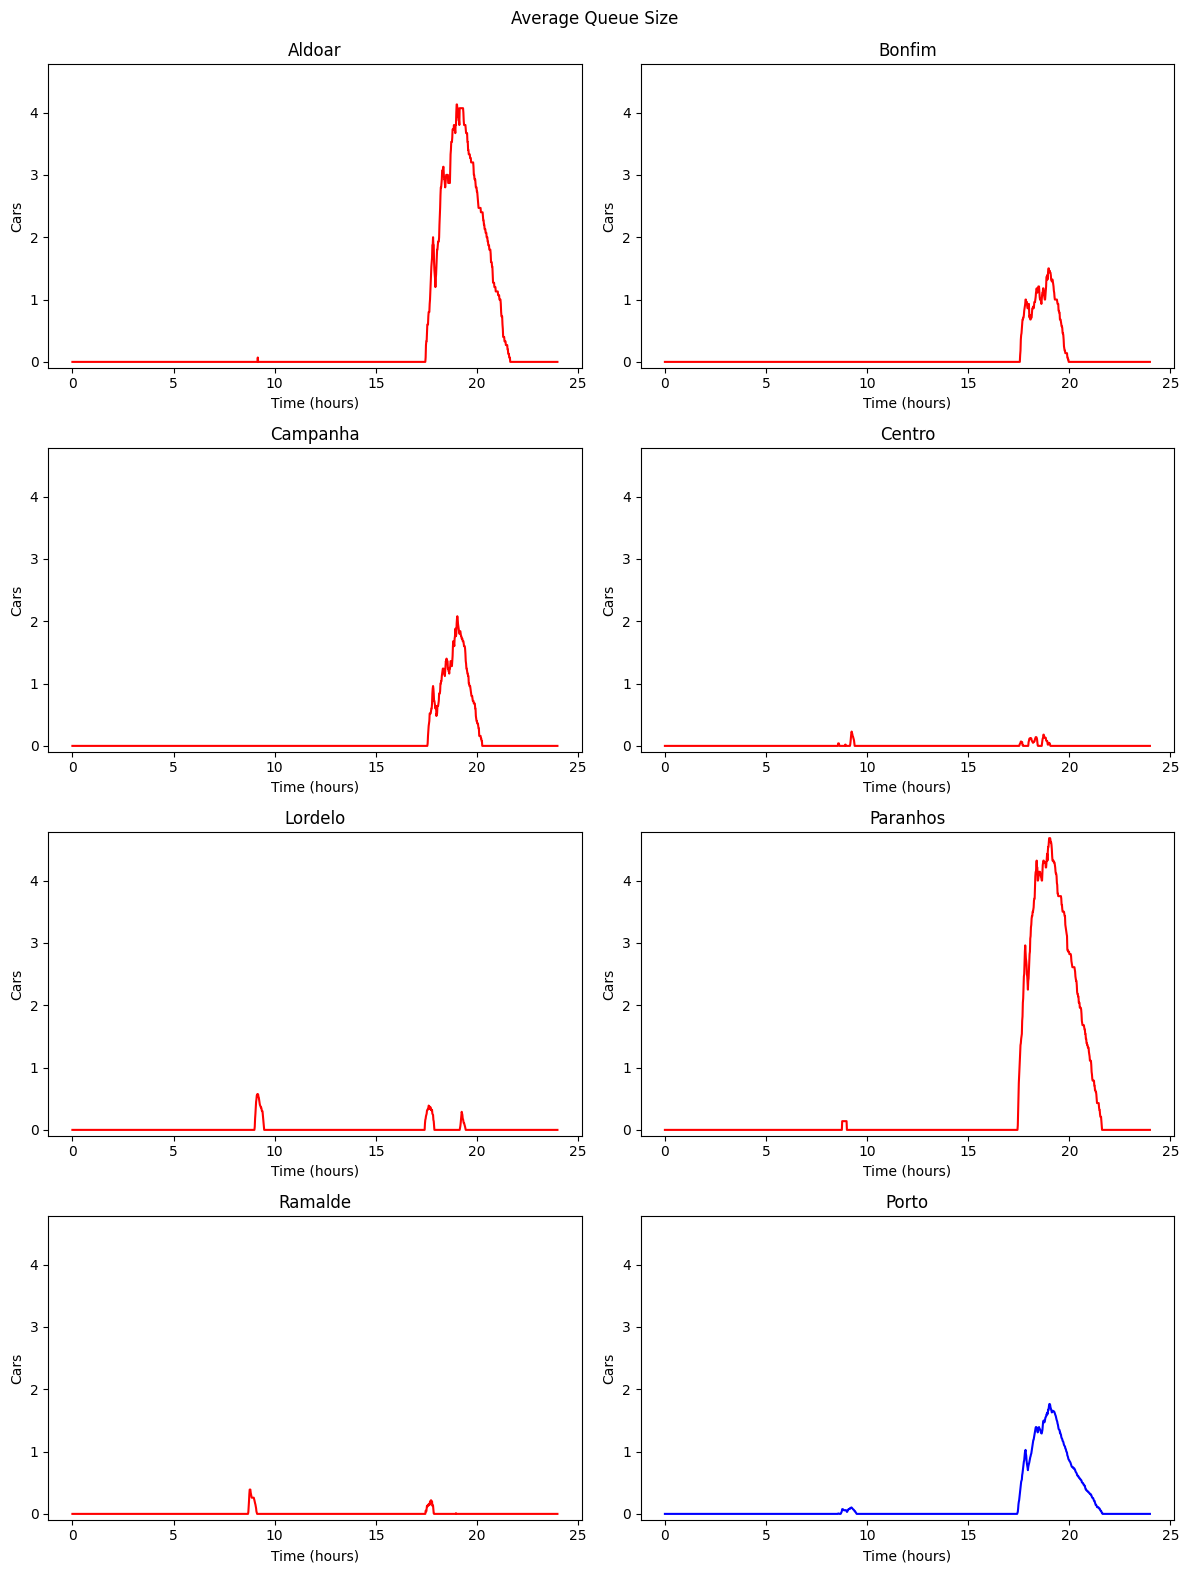

In [8]:
def plot_queue_size(regions, region_data, global_limits, hours):
    num_regions = len(regions)
    cols = 2
    rows = (num_regions + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    fig.suptitle("Average Queue Size", fontsize=12)
    axes = axes.flatten()
    min_queue, max_queue = global_limits['queue']
    y_min = min_queue - 0.02 * (max_queue - min_queue)
    y_max = max_queue + 0.02 * (max_queue - min_queue)
    for i, region in enumerate(regions):
        ax = axes[i]
        ax.plot(hours, region_data[region]['queue'], color='r')
        ax.set_title(region)
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel("Cars")
        ax.set_ylim(y_min, y_max)
    total_queue = [
        sum(region_data[region]['queue'][j] for region in regions) / num_regions
        for j in range(len(hours))
    ]
    ax_total = axes[-1]
    ax_total.plot(hours, total_queue, color='b')
    ax_total.set_title("Porto")
    ax_total.set_xlabel("Time (hours)")
    ax_total.set_ylabel("Cars")
    ax_total.set_ylim(y_min, y_max)
    plt.tight_layout(rect=[0, 0, 1, 0.99]) 
    plt.show()

plot_queue_size(regions, region_data, global_limits, hours)

### Average Queue Wait Time

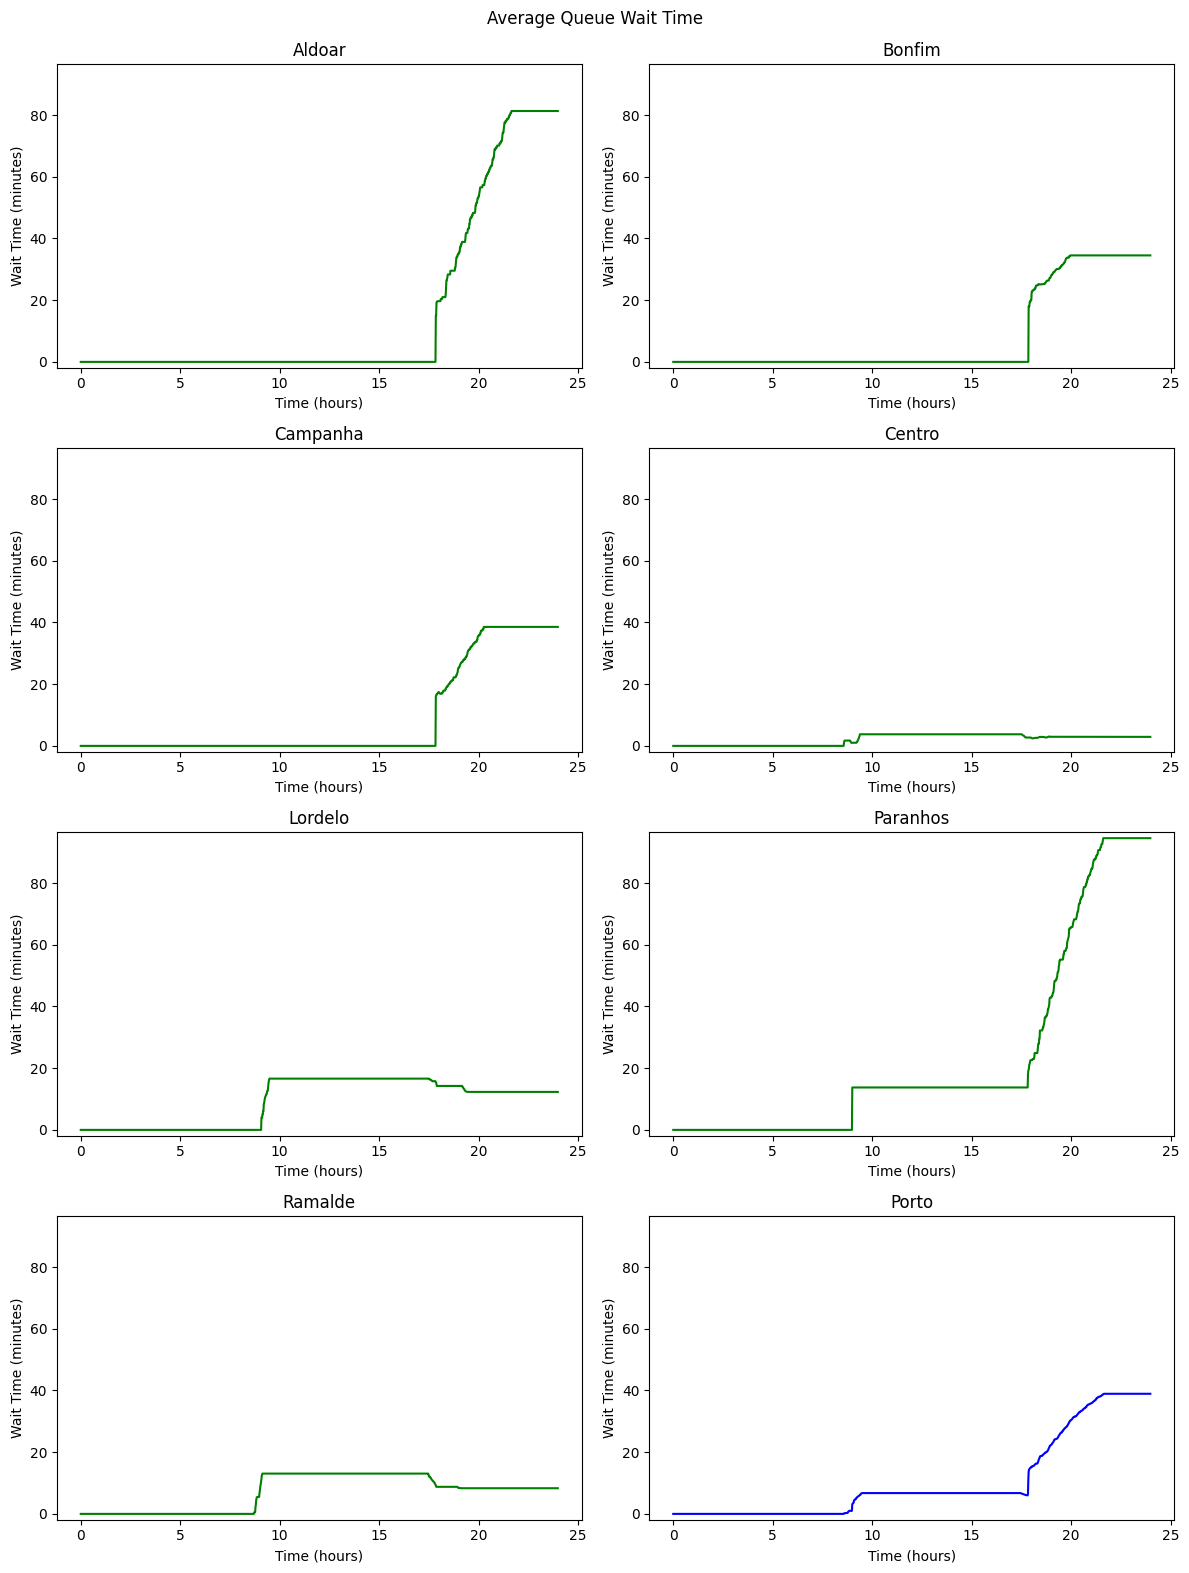

In [9]:
def plot_wait_time(regions, region_data, global_limits, hours):
    num_regions = len(regions)
    cols = 2
    rows = (num_regions + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    fig.suptitle("Average Queue Wait Time", fontsize=12)
    axes = axes.flatten()
    min_wait, max_wait = global_limits['wait_time']
    y_min = min_wait - 0.02 * (max_wait - min_wait)
    y_max = max_wait + 0.02 * (max_wait - min_wait)
    for i, region in enumerate(regions):
        ax = axes[i]
        ax.plot(hours, region_data[region]['wait'], color='g')
        ax.set_title(region)
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel("Wait Time (minutes)")
        ax.set_ylim(y_min, y_max)
    avg_wait_time = [
        sum(region_data[region]['wait'][j] for region in regions) / num_regions
        for j in range(len(hours))
    ]
    ax_total = axes[-1]
    ax_total.plot(hours, avg_wait_time, color='b')
    ax_total.set_title("Porto")
    ax_total.set_xlabel("Time (hours)")
    ax_total.set_ylabel("Wait Time (minutes)")
    ax_total.set_ylim(y_min, y_max)
    plt.tight_layout(rect=[0, 0, 1, 0.99]) 
    plt.show()

plot_wait_time(regions, region_data, global_limits, hours)

### Average Battery Level

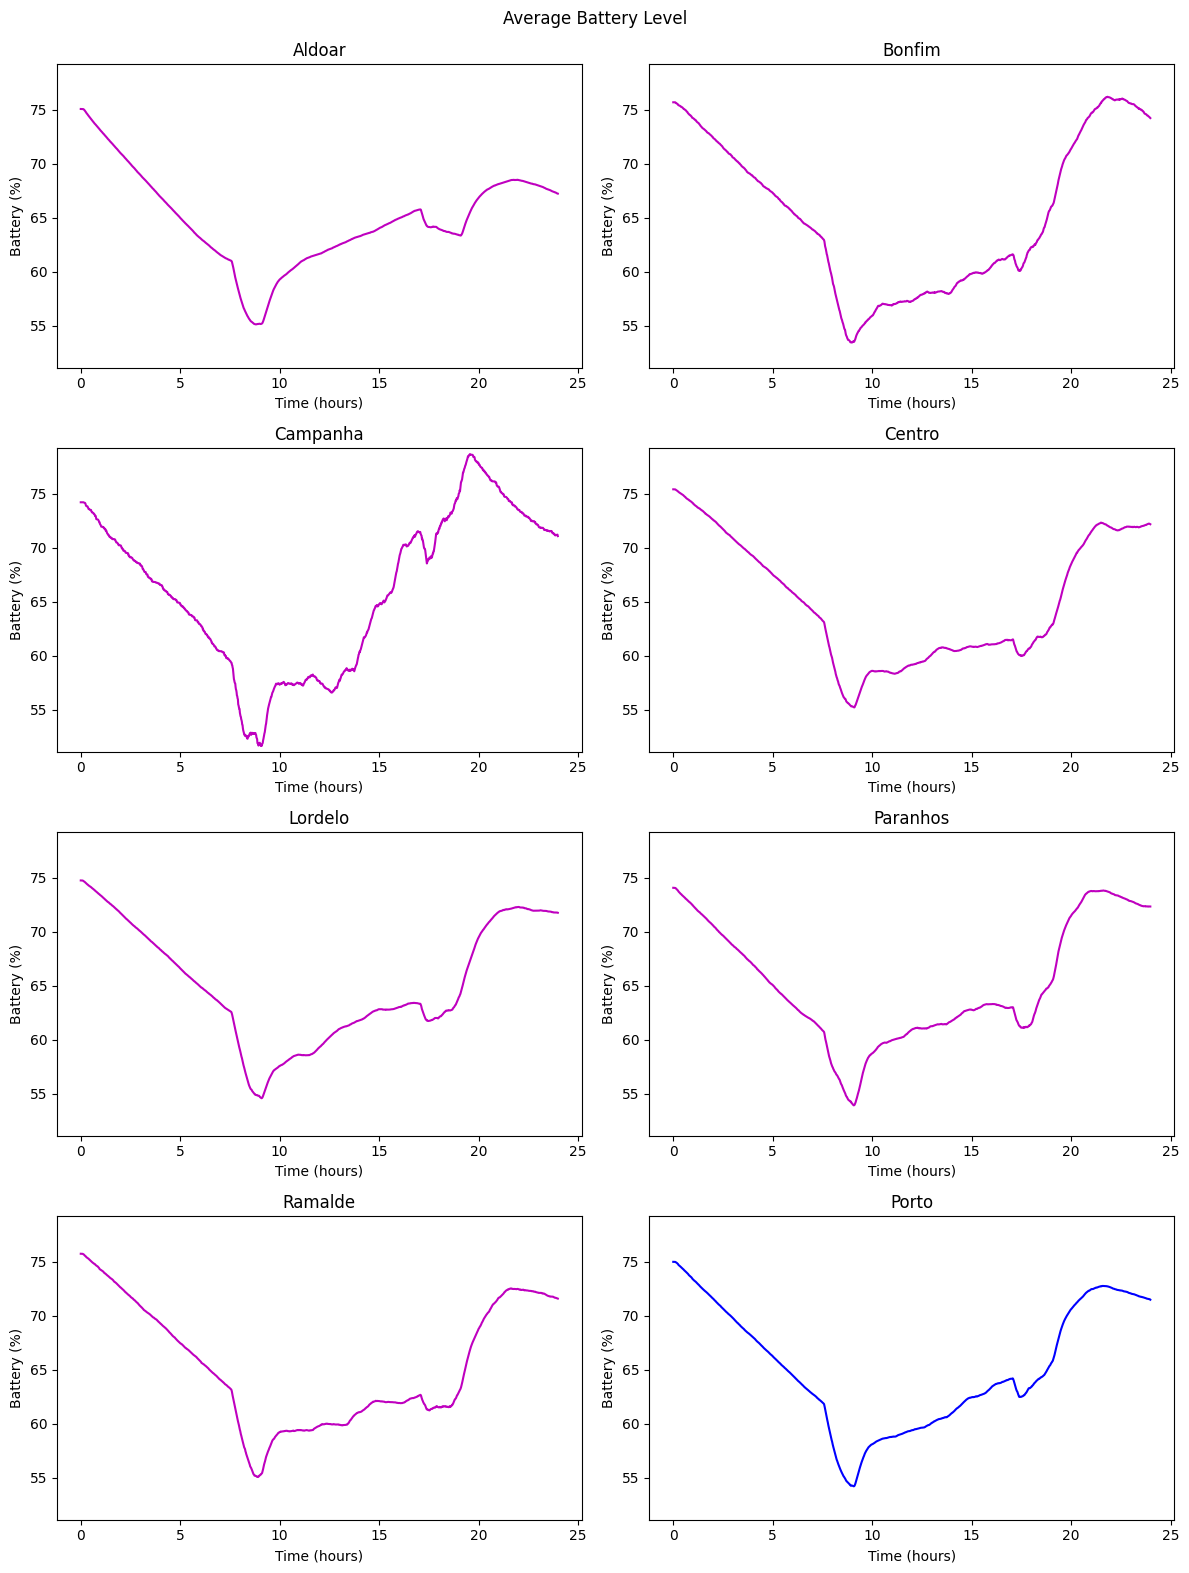

In [10]:
def plot_car_battery(regions, region_data, global_limits, hours):
    num_regions = len(regions)
    cols = 2
    rows = (num_regions + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    fig.suptitle("Average Battery Level", fontsize=12)
    axes = axes.flatten()
    min_autonomy, max_autonomy = global_limits['autonomy']
    y_min = min_autonomy - 0.02 * (max_autonomy - min_autonomy)
    y_max = max_autonomy + 0.02 * (max_autonomy - min_autonomy)
    for i, region in enumerate(regions):
        ax = axes[i]
        ax.plot(hours, region_data[region]['autonomy'], color='m')
        ax.set_title(region)
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel("Battery (%)")
        ax.set_ylim(y_min, y_max)
    avg_autonomy = [
        sum(region_data[region]['autonomy'][j] for region in regions) / num_regions
        for j in range(len(hours))
    ]
    ax_total = axes[-1]
    ax_total.plot(hours, avg_autonomy, color='b')
    ax_total.set_title("Porto")
    ax_total.set_xlabel("Time (hours)")
    ax_total.set_ylabel("Battery (%)")
    ax_total.set_ylim(y_min, y_max)
    plt.tight_layout(rect=[0, 0, 1, 0.99]) 
    plt.show()

plot_car_battery(regions, region_data, global_limits, hours)